This Notebook explores these 4 algorithms :
- HITS
- PageRank
- Randomized HITS
- Subspace HITS

Each algorithm was run on a small graph and a large graph.

All graphs were generated using the **networkx** library, and every graph was generated such that each node/page has at least one of an incoming or outgoing edge, using the function **generate_connected_directed_graph()**.

# HITS Algorithm

In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def generate_connected_directed_graph(num_nodes, edge_prob):
    """
    Generates a random directed graph where each node has at least one incoming or outgoing connection.
    
    Parameters:
    - num_nodes: Number of nodes in the graph
    - edge_prob: Probability of an edge being created between two nodes
    
    Returns:
    - A directed graph (DiGraph) with all nodes connected
    """
    while True:
        G = nx.gnp_random_graph(num_nodes, edge_prob, directed=True)
        
        # Ensure all nodes have at least one incoming or outgoing edge
        isolated_nodes = [node for node in G.nodes() if G.in_degree(node) == 0 and G.out_degree(node) == 0]
        
        if not isolated_nodes:
            return G  # Return the graph if all nodes have connections

        # Add random edges to isolated nodes
        for node in isolated_nodes:
            target = random.choice(list(G.nodes() - {node}))  # Select a random target node
            G.add_edge(node, target)  # Add an outgoing edge
            if random.random() < 0.5:  # 50% chance to add an incoming edge
                G.add_edge(target, node)

def hits_algorithm(G, threshold, k=100):
    """
    Compute HITS (Hyperlink-Induced Topic Search) scores for a directed graph with early stopping.
    
    Parameters:
    - G: Directed graph (NetworkX DiGraph)
    - k: Maximum number of iterations
    - epsilon: Convergence threshold (stops when max change < epsilon)
    
    Returns:
    - Dictionary of authority scores
    - Dictionary of hub scores
    """

    # Arrays for plotting change
    auth_changes = []
    hub_changes = []
    iteration_count = []
    
    # Initialize all nodes with authority = 1 and hub = 1
    for node in G.nodes():
        G.nodes[node]['authority'] = 1.0
        G.nodes[node]['hub'] = 1.0

    for iteration in range(k):
        # Store old values for convergence check
        old_authorities = {node: G.nodes[node]['authority'] for node in G.nodes()}
        old_hubs = {node: G.nodes[node]['hub'] for node in G.nodes()}

        # Step 1: Update authority scores
        norm = 0
        for node in G.nodes():
            G.nodes[node]['authority'] = sum(G.nodes[neighbor]['hub'] for neighbor in G.predecessors(node))
            norm += G.nodes[node]['authority'] ** 2  # Sum of squared values
        
        norm = np.sqrt(norm)  # Normalization factor
        if norm > 0:
            for node in G.nodes():
                G.nodes[node]['authority'] /= norm  # Normalize

        # Step 2: Update hub scores
        norm = 0
        for node in G.nodes():
            G.nodes[node]['hub'] = sum(G.nodes[neighbor]['authority'] for neighbor in G.successors(node))
            norm += G.nodes[node]['hub'] ** 2  # Sum of squared values

        norm = np.sqrt(norm)  # Normalization factor
        if norm > 0:
            for node in G.nodes():
                G.nodes[node]['hub'] /= norm  # Normalize

        # Check for convergence
        max_auth_change = max(abs(G.nodes[node]['authority'] - old_authorities[node]) for node in G.nodes())
        max_hub_change = max(abs(G.nodes[node]['hub'] - old_hubs[node]) for node in G.nodes())

        # Append Values
        auth_changes.append(max_auth_change)
        hub_changes.append(max_hub_change)
        iteration_count.append(iteration+1)

        if max(max_auth_change, max_hub_change) < threshold:
            print(f"Converged after {iteration + 1} iterations!")
            break

    # Extract final scores
    authority_scores = {node: G.nodes[node]['authority'] for node in G.nodes()}
    hub_scores = {node: G.nodes[node]['hub'] for node in G.nodes()}
    
    return authority_scores, hub_scores, auth_changes, hub_changes, iteration_count

### Small Graph

Converged after 13 iterations!
Authority Changes : [0.8686227629114276, 0.04028533795058338, 0.0049981423551239135, 0.0007783870381604108, 0.00017121242469131381, 3.807041241293829e-05, 8.723536747967664e-06, 2.0726202410448202e-06, 5.498128278769165e-07, 1.5021024279970874e-07, 4.185936336442708e-08, 1.1842142405571465e-08, 3.537995119096138e-09]
Hub Changes : [0.8977650573364739, 0.0145879571097762, 0.002090174808369219, 0.0003052086738287163, 6.780240332696086e-05, 1.7637001242493122e-05, 4.69912515321802e-06, 1.278555548045457e-06, 3.540814260127867e-07, 9.94847167423707e-08, 2.8275406765976285e-08, 8.109257682020754e-09, 2.342007948685776e-09]


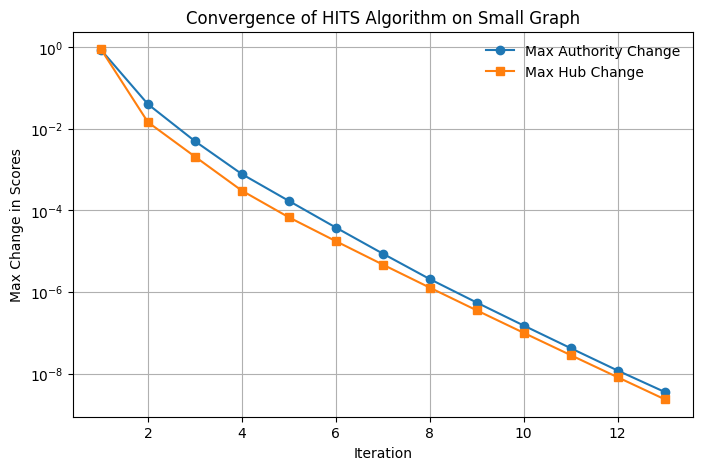

In [14]:
# Small Graph with 20 Nodes
num_nodes_small = 20
edge_prob = 0.3
threshold = 1e-8

# Generate Graph
G = generate_connected_directed_graph(num_nodes_small, edge_prob)

# Run HITS algorithm
authority_small, hub_small, auth_changes_small, hub_changes_small, iteration_count_small = hits_algorithm(G, threshold, k=100)
print(f"Authority Changes : {auth_changes_small}")
print(f"Hub Changes : {hub_changes_small}")

# Plot convergence
plt.figure(figsize=(8, 5))
plt.plot(iteration_count_small, auth_changes_small, label="Max Authority Change", marker='o', linestyle='-')
plt.plot(iteration_count_small, hub_changes_small, label="Max Hub Change", marker='s', linestyle='-')
plt.xlabel("Iteration")
plt.ylabel("Max Change in Scores")
plt.title("Convergence of HITS Algorithm on Small Graph")
plt.yscale("log")  # Log scale to better visualize small changes
plt.legend(frameon=False)
plt.savefig('hits_small')
plt.grid(True)
plt.show()

### Large Graph

Converged after 4 iterations!
Authority Changes : [0.9802120609942542, 0.0001029447304477342, 2.567910657134964e-07, 7.679219760081679e-10]
Hub Changes : [0.9803528682614046, 4.355288949660363e-06, 1.2803388849125241e-08, 4.6335012215958926e-11]


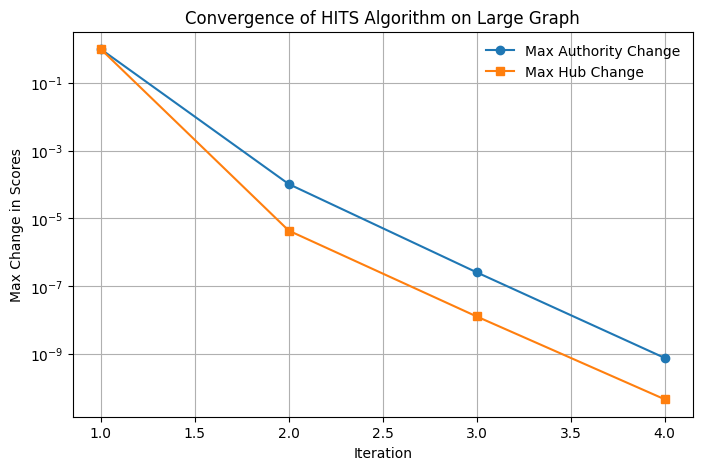

In [17]:
# Large Graph with 2000 Nodes
num_nodes_large = 2000
edge_prob = 0.3
threshold = 1e-8

# Generate Graph
G = generate_connected_directed_graph(num_nodes_large, edge_prob)

# Run HITS algorithm
authority_large, hub_large, auth_changes_large, hub_changes_large, iteration_count_large = hits_algorithm(G, threshold, k=100)
print(f"Authority Changes : {auth_changes_large}")
print(f"Hub Changes : {hub_changes_large}")

# Plot convergence
plt.figure(figsize=(8, 5))
plt.plot(iteration_count_large, auth_changes_large, label="Max Authority Change", marker='o', linestyle='-')
plt.plot(iteration_count_large, hub_changes_large, label="Max Hub Change", marker='s', linestyle='-')
plt.xlabel("Iteration")
plt.ylabel("Max Change in Scores")
plt.title("Convergence of HITS Algorithm on Large Graph")
plt.yscale("log")  # Log scale to better visualize small changes
plt.legend(frameon=False)
plt.savefig('hits_large')
plt.grid(True)
plt.show()

### Combined Plots

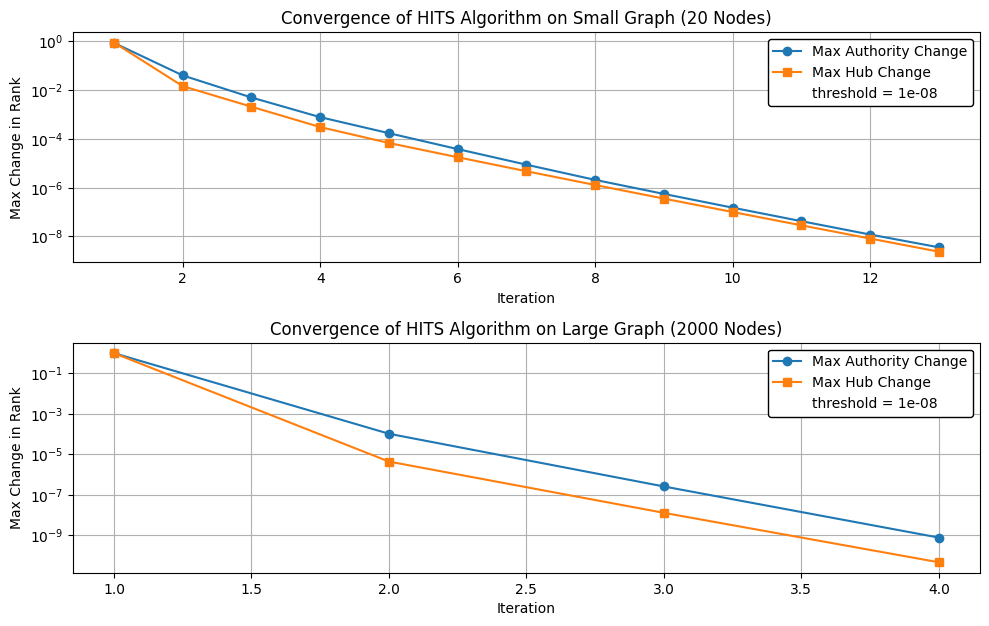

In [19]:
# Create figure
fig = plt.figure(figsize=(10, 8))

# Create subplots using subplot2grid
plot1 = plt.subplot2grid((8, 2), (0, 0), colspan=2, rowspan=3)
plot2 = plt.subplot2grid((8, 2), (3, 0), colspan=2, rowspan=3)

# Plot for Small Graph
plot1.plot(iteration_count_small, auth_changes_small, label="Max Authority Change", marker='o', linestyle='-')
plot1.plot(iteration_count_small, hub_changes_small, label="Max Hub Change", marker='s', linestyle='-')
plot1.plot([], [], label=f'threshold = {threshold}', linestyle='none')
plot1.set_xlabel("Iteration")
plot1.set_ylabel("Max Change in Rank")
plot1.set_title("Convergence of HITS Algorithm on Small Graph (20 Nodes)")
plot1.set_yscale("log")
plot1.legend(frameon=True, facecolor='white', edgecolor='black', framealpha=1.0)
plot1.grid(True)

# Plot for Large Graph
plot2.plot(iteration_count_large, auth_changes_large, label="Max Authority Change", marker='o', linestyle='-')
plot2.plot(iteration_count_large, hub_changes_large, label="Max Hub Change", marker='s', linestyle='-')
plot2.plot([], [], label=f'threshold = {threshold}', linestyle='none')
plot2.set_xlabel("Iteration")
plot2.set_ylabel("Max Change in Rank")
plot2.set_title("Convergence of HITS Algorithm on Large Graph (2000 Nodes)")
plot2.set_yscale("log")
plot2.legend(frameon=True, facecolor='white', edgecolor='black', framealpha=1.0)
plot2.grid(True)

plt.tight_layout()
plt.savefig('hits_comparison.png', bbox_inches='tight', dpi=300)
plt.show()

# PageRank Algorithm

In [23]:
def pagerank(G, delta, threshold, max_iter=1000):
    # Initialize ranks
    n = len(G)
    ranks = {node: 1 / n for node in G.nodes()}

    rank_changes = []
    iterations = []

    for i in range(max_iter):
        new_ranks = {}
        for node in G.nodes():
            # Calculate the new rank of the node
            inbound_rank_sum = sum(ranks[neighbor] / len(list(G.neighbors(neighbor))) for neighbor in G.predecessors(node))
            new_ranks[node] = (1 - delta) / n + delta * inbound_rank_sum
        
        # Check for convergence
        max_rank_change = max(abs(new_ranks[node] - ranks[node]) for node in G.nodes())
        ranks = new_ranks

        rank_changes.append(max_rank_change)
        iterations.append(i+1)

        if max_rank_change < threshold:
            print(f"Converged in {i+1} Iterations!")
            break

    return ranks, rank_changes, iterations

### Small Graph

Converged in 7 Iterations!
Rank Changes : [0.007773809523809523, 0.0007123544973544962, 4.661566830436309e-05, 3.126242172475646e-06, 1.7976178181416946e-07, 3.511334192851656e-08, 1.2671964380595035e-09]


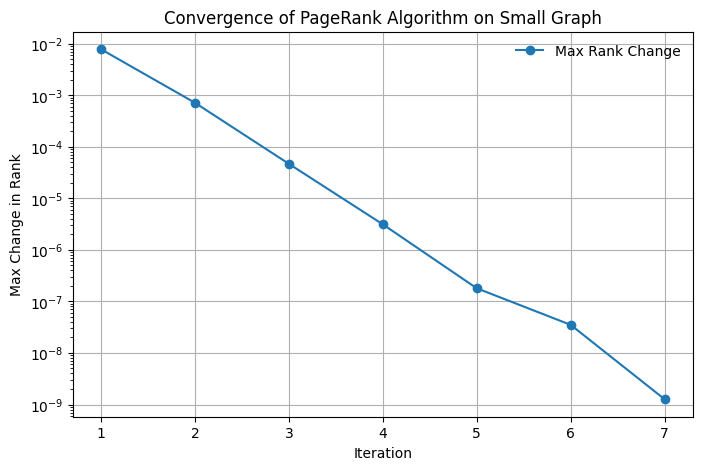

In [28]:
# Small Graph with 20 Nodes
num_nodes_small = 20
edge_prob = 0.3
threshold = 1e-8

#Generate Graph
G = generate_connected_directed_graph(num_nodes_small, edge_prob)

#Set Parameters
delta = 0.2
threshold = 1e-8

# Run PageRank
ranks_small, rank_changes_small, iterations_small = pagerank(G, delta, threshold)
print(f"Rank Changes : {rank_changes_small}")

# Plot rank_changes
plt.figure(figsize=(8, 5))
plt.plot(iterations_small, rank_changes_small, label="Max Rank Change", marker='o', linestyle='-')
plt.xlabel("Iteration")
plt.ylabel("Max Change in Rank")
plt.title("Convergence of PageRank Algorithm on Small Graph")
plt.yscale("log")  # Log scale to better visualize small changes
plt.legend(frameon=False)
plt.savefig('pagerank_small')
plt.grid(True)
plt.show()

### Large Graph

Converged in 3 Iterations!
Rank Changes : [1.1155831239404671e-05, 8.764419611633281e-08, 6.790493354245919e-10]


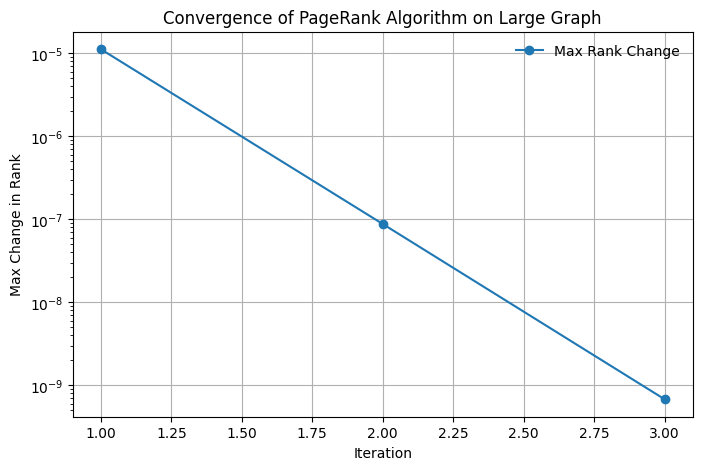

In [32]:
# Large Graph with 2000 Nodes
num_nodes_large = 2000
edge_prob = 0.3
threshold = 1e-8

# Generate Graph
G = generate_connected_directed_graph(num_nodes_large, edge_prob)

# Set Parameters
delta = 0.2
threshold = 1e-8

# Run PageRank
ranks_large, rank_changes_large, iterations_large = pagerank(G, delta, threshold)
print(f"Rank Changes : {rank_changes_large}")

# Plot rank_changes
plt.figure(figsize=(8, 5))
plt.plot(iterations_large, rank_changes_large, label="Max Rank Change", marker='o', linestyle='-')
plt.xlabel("Iteration")
plt.ylabel("Max Change in Rank")
plt.title("Convergence of PageRank Algorithm on Large Graph")
plt.yscale("log")  # Log scale to better visualize small changes
plt.legend(frameon=False)
plt.savefig('pagerank_large')
plt.grid(True)
plt.show()

### Combined Plots

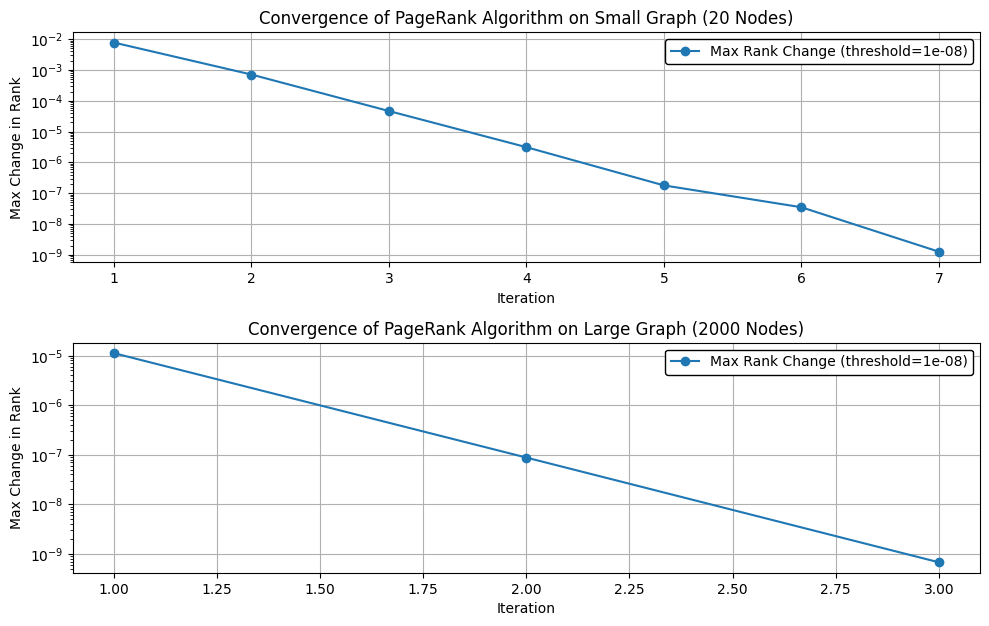

In [35]:
# Create figure
fig = plt.figure(figsize=(10, 8))

# Create subplots using subplot2grid
plot1 = plt.subplot2grid((8, 2), (0, 0), colspan=2, rowspan=3)
plot2 = plt.subplot2grid((8, 2), (3, 0), colspan=2, rowspan=3)

# Plot for Small Graph
plot1.plot(iterations_small, rank_changes_small, label=f"Max Rank Change (threshold={threshold:g})", marker='o', linestyle='-')
plot1.set_xlabel("Iteration")
plot1.set_ylabel("Max Change in Rank")
plot1.set_title("Convergence of PageRank Algorithm on Small Graph (20 Nodes)")
plot1.set_yscale("log")
plot1.legend(frameon=True, facecolor='white', edgecolor='black', framealpha=1.0)
plot1.grid(True)

# Plot for Large Graph
plot2.plot(iterations_large, rank_changes_large, label=f"Max Rank Change (threshold={threshold:g})", marker='o', linestyle='-')
plot2.set_xlabel("Iteration")
plot2.set_ylabel("Max Change in Rank")
plot2.set_title("Convergence of PageRank Algorithm on Large Graph (2000 Nodes)")
plot2.set_yscale("log")
plot2.legend(frameon=True, facecolor='white', edgecolor='black', framealpha=1.0)
plot2.grid(True)

plt.tight_layout()
plt.savefig('pagerank_comparison.png', bbox_inches='tight', dpi=300)
plt.show()

# Randomized HITS Algorithm

In [48]:
import random

def randomized_hits(G, delta, threshold=1e-3, max_steps=1000001):
    """
    Improved Randomized HITS Algorithm to find hub and authority scores, and track convergence of probabilities.
    
    Parameters:
    - G: Directed Graph (networkx DiGraph)
    - delta: Probability of following a link (1 - delta is the probability of random jump)
    - threshold: Convergence threshold for the probability distribution changes
    - max_steps: Maximum number of time steps, Odd number as suggested by paper
    
    Returns:
    - hubs: Hub scores of the nodes
    - authorities: Authority scores of the nodes
    - rank_changes: List of maximum probability changes for each time step
    - time_steps: List of time step counts for plotting convergence
    - node_probabilities: Probability of being at each node at each time step
    """
    # Check for empty graph
    n = len(G)
    if n == 0:
        return {}, {}, [], [], {}
    
    # Initialize hub and authority scores uniformly
    hubs = {node: 1.0 / n for node in G.nodes()}
    authorities = {node: 1.0 / n for node in G.nodes()}

    # Initialize probability tracking with sliding window
    window_size = 100
    recent_visits = {node: 0 for node in G.nodes()}
    node_probabilities = {node: 1.0 / n for node in G.nodes()}
    prev_node_probabilities = node_probabilities.copy()

    probability_changes = []  # Track changes in probability distribution
    time_steps = []  # Track the number of time steps

    # Choose a random starting node
    current_node = random.choice(list(G.nodes()))

    for step in range(max_steps):
        # Coin toss (with probability `delta`) to decide if the surfer jumps
        if random.random() < delta:
            # Reset: Jump to a random node
            current_node = random.choice(list(G.nodes()))
        else:
            if step % 2 == 0:  # Even time step: Update hubs by following out-links
                neighbors = list(G.neighbors(current_node))
                if neighbors:  # If there are out-links
                    current_node = random.choice(neighbors)
                else:  # If no out-links, random jump
                    current_node = random.choice(list(G.nodes()))
            
            else:  # Odd time step: Update authorities by following in-links
                predecessors = list(G.predecessors(current_node))
                if predecessors:  # If there are in-links
                    current_node = random.choice(predecessors)
                else:  # If no in-links, random jump
                    current_node = random.choice(list(G.nodes()))

        # Update recent visits for the sliding window
        recent_visits[current_node] += 1
        
        # Update probability distribution based on recent visits
        if step >= window_size:
            total_recent = sum(recent_visits.values())
            if total_recent > 0:
                for node in G.nodes():
                    node_probabilities[node] = recent_visits[node] / total_recent

        # Update hub/authority scores
        if step % 2 == 0:  # Even step: Update hub scores
            for node in G.nodes():
                # Avoid division by zero by checking in-degree
                in_neighbors = list(G.predecessors(node))
                if in_neighbors:
                    hubs[node] = (1 - delta) / n + delta * sum(authorities[neighbor] for neighbor in in_neighbors)
                else:
                    hubs[node] = (1 - delta) / n
        
        else:  # Odd step: Update authority scores
            for node in G.nodes():
                # Avoid division by zero by checking out-degree
                out_neighbors = list(G.neighbors(node))
                if out_neighbors:
                    authorities[node] = (1 - delta) / n + delta * sum(hubs[neighbor] for neighbor in out_neighbors)
                else:
                    authorities[node] = (1 - delta) / n

        # Normalize hub and authority scores
        hub_norm = sum(hubs.values())
        auth_norm = sum(authorities.values())
        
        if hub_norm > 0:
            hubs = {node: score/hub_norm for node, score in hubs.items()}
        if auth_norm > 0:
            authorities = {node: score/auth_norm for node, score in authorities.items()}

        # Calculate maximum change in probabilities
        max_prob_change = max(abs(node_probabilities[node] - prev_node_probabilities[node]) 
                            for node in G.nodes())

        # Store tracking information
        probability_changes.append(max_prob_change)
        time_steps.append(step + 1)

        # Update previous probabilities
        prev_node_probabilities = node_probabilities.copy()

        # Check for convergence
        if step > window_size and max_prob_change < threshold:
            print(f"Converged in {step + 1} time steps!")
            break

    return hubs, authorities, probability_changes, time_steps, node_probabilities

### Small Graph

Converged in 8608 time steps!


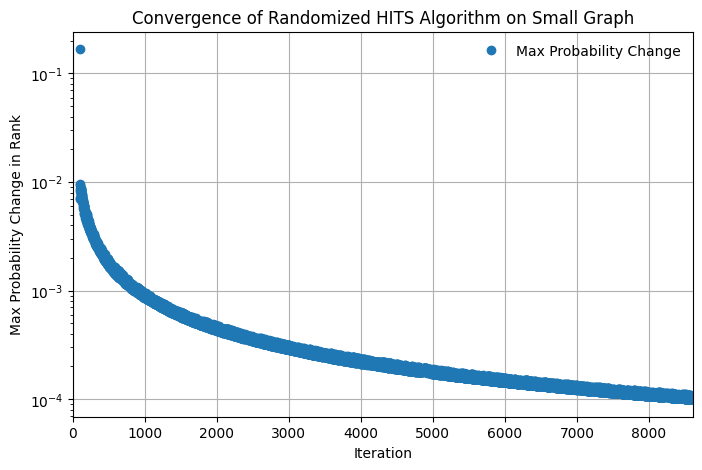

In [51]:
# Small Graph with 10 Nodes
num_nodes_small = 10
edge_prob = 0.3

#Generate Graph
G = generate_connected_directed_graph(num_nodes_small, edge_prob)

#Set Parameters
delta = 0.2
threshold = 1e-4

# Run Randomized HITS
hubs_small, authorities_small, probability_changes_small, time_steps_small, node_probabilities_small = randomized_hits(G, delta, threshold)
#print(f"Rank Changes : {probability_changes}")

# Plot rank_changes
plt.figure(figsize=(8, 5))
plt.plot(time_steps_small, probability_changes_small, label="Max Probability Change", marker='o', linestyle='None')
plt.xlim(0, max(time_steps_small))
plt.xlabel("Iteration")
plt.ylabel("Max Probability Change in Rank")
plt.title("Convergence of Randomized HITS Algorithm on Small Graph")
plt.yscale("log")  # Log scale to better visualize small changes
plt.legend(frameon=False)
plt.savefig('rand_hits_small')
plt.grid(True)
plt.show()

### Large Graph

Converged in 9989 time steps!


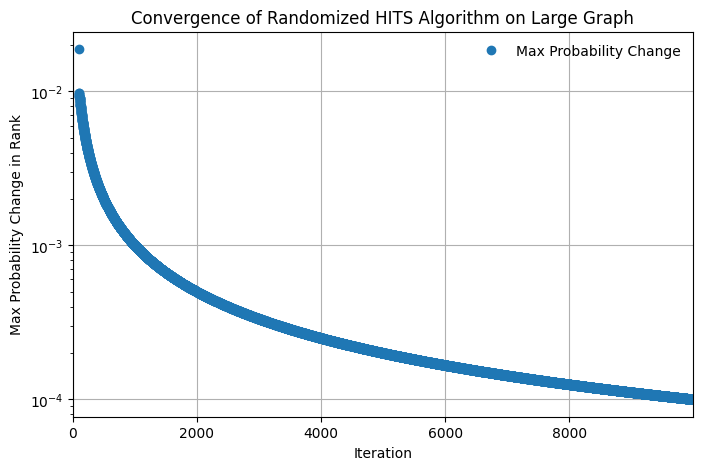

In [54]:
# Large Graph with 1000 Nodes
num_nodes_large = 1000
edge_prob = 0.3

#Generate Graph
G = generate_connected_directed_graph(num_nodes_large, edge_prob)

#Set Parameters
delta = 0.2
threshold = 1e-4

# Run Randomized HITS
hubs_large, authorities_large, probability_changes_large, time_steps_large, node_probabilities_large = randomized_hits(G, delta, threshold)
#print(f"Rank Changes : {probability_changes}")

# Plot rank_changes
plt.figure(figsize=(8, 5))
plt.plot(time_steps_large, probability_changes_large, label="Max Probability Change", marker='o', linestyle='None')
plt.xlim(0, max(time_steps_large))
plt.xlabel("Iteration")
plt.ylabel("Max Probability Change in Rank")
plt.title("Convergence of Randomized HITS Algorithm on Large Graph")
plt.yscale("log")  # Log scale to better visualize small changes
plt.legend(frameon=False)
plt.savefig('rand_hits_large')
plt.grid(True)
plt.show()

### Combined Plots

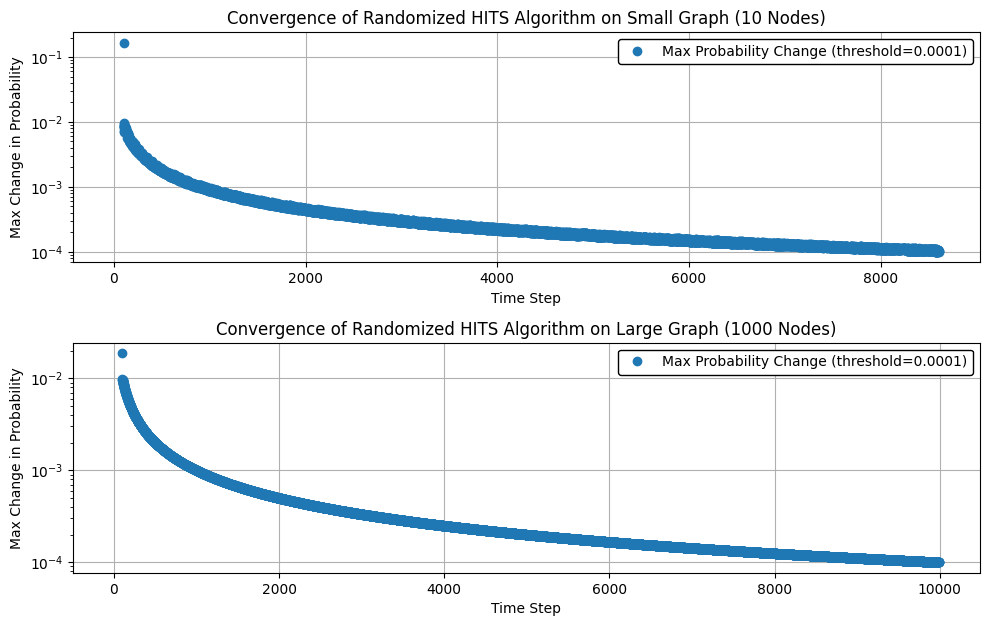

In [57]:
# Create figure
fig = plt.figure(figsize=(10, 8))

# Create subplots using subplot2grid
plot1 = plt.subplot2grid((8, 2), (0, 0), colspan=2, rowspan=3)
plot2 = plt.subplot2grid((8, 2), (3, 0), colspan=2, rowspan=3)

# Plot for Small Graph
plot1.plot(time_steps_small, probability_changes_small, label=f"Max Probability Change (threshold={threshold})", marker='o', linestyle='None')
plot1.set_xlabel("Time Step")
plot1.set_ylabel("Max Change in Probability")
plot1.set_title("Convergence of Randomized HITS Algorithm on Small Graph (10 Nodes)")
plot1.set_yscale("log")
plot1.legend(frameon=True, facecolor='white', edgecolor='black', framealpha=1.0)
plot1.grid(True)

# Plot for Large Graph
plot2.plot(time_steps_large, probability_changes_large, label=f"Max Probability Change (threshold={threshold})", marker='o', linestyle='None')
plot2.set_xlabel("Time Step")
plot2.set_ylabel("Max Change in Probability")
plot2.set_title("Convergence of Randomized HITS Algorithm on Large Graph (1000 Nodes)")
plot2.set_yscale("log")
plot2.legend(frameon=True, facecolor='white', edgecolor='black', framealpha=1.0)
plot2.grid(True)

plt.tight_layout()
plt.savefig('randomized_hits_comparison.png', bbox_inches='tight', dpi=300)
plt.show()

# Subspace HITS Algorithm

In [60]:
from scipy import sparse
from scipy.sparse.linalg import svds

def subspace_hits(G, k=3, max_iter=10000, threshold=1e-8):
    """
    Subspace HITS Algorithm implementation
    
    Parameters:
    - G: NetworkX directed graph
    - k: Number of dimensions/topics to extract
    - max_iter: Maximum iterations for power iteration
    - threshold: Convergence threshold
    
    Returns:
    - hub_vectors: k different hub vectors
    - authority_vectors: k different authority vectors
    - convergence_changes: List of maximum changes in eigenvectors
    - time_steps: List of iteration counts
    """
    n = len(G)
    if n == 0:
        return np.array([]), np.array([]), [], []
    
    # Create adjacency matrix
    A = nx.adjacency_matrix(G).astype(float)
    
    # Initialize vectors randomly
    hub_vectors = np.random.rand(n, k)
    auth_vectors = np.random.rand(n, k)
    
    # Normalize initial vectors
    for i in range(k):
        hub_vectors[:, i] = hub_vectors[:, i] / np.linalg.norm(hub_vectors[:, i])
        auth_vectors[:, i] = auth_vectors[:, i] / np.linalg.norm(auth_vectors[:, i])
    
    convergence_changes = []
    iterations = []
    
    # Power iteration method with orthogonalization
    for iter in range(max_iter):
        prev_hub = hub_vectors.copy()
        prev_auth = auth_vectors.copy()
        
        # Update authority vectors
        for i in range(k):
            # Authority update
            auth_vectors[:, i] = A.T @ hub_vectors[:, i]
            
            # Orthogonalize against previous vectors
            for j in range(i):
                auth_vectors[:, i] -= np.dot(auth_vectors[:, i], auth_vectors[:, j]) * auth_vectors[:, j]
            
            # Normalize
            norm = np.linalg.norm(auth_vectors[:, i])
            if norm > 0:
                auth_vectors[:, i] = auth_vectors[:, i] / norm
        
        # Update hub vectors
        for i in range(k):
            # Hub update
            hub_vectors[:, i] = A @ auth_vectors[:, i]
            
            # Orthogonalize against previous vectors
            for j in range(i):
                hub_vectors[:, i] -= np.dot(hub_vectors[:, i], hub_vectors[:, j]) * hub_vectors[:, j]
            
            # Normalize
            norm = np.linalg.norm(hub_vectors[:, i])
            if norm > 0:
                hub_vectors[:, i] = hub_vectors[:, i] / norm
        
        # Calculate maximum change in both hub and authority vectors
        hub_change = np.max(np.abs(hub_vectors - prev_hub))
        auth_change = np.max(np.abs(auth_vectors - prev_auth))
        max_change = max(hub_change, auth_change)
        
        convergence_changes.append(max_change)
        iterations.append(iter + 1)
        
        # Check convergence
        if max_change < threshold:
            print(f"Converged in {iter + 1} iterations!")
            break
    
    # Sort eigenvectors by eigenvalue magnitude
    eigenvalues = np.zeros(k)
    for i in range(k):
        eigenvalues[i] = np.dot(hub_vectors[:, i], A @ auth_vectors[:, i])
    
    # Sort indices
    idx = np.argsort(-np.abs(eigenvalues))
    hub_vectors = hub_vectors[:, idx]
    auth_vectors = auth_vectors[:, idx]
    
    return hub_vectors, auth_vectors, convergence_changes, iterations

### Small Graph

Converged in 49 iterations!


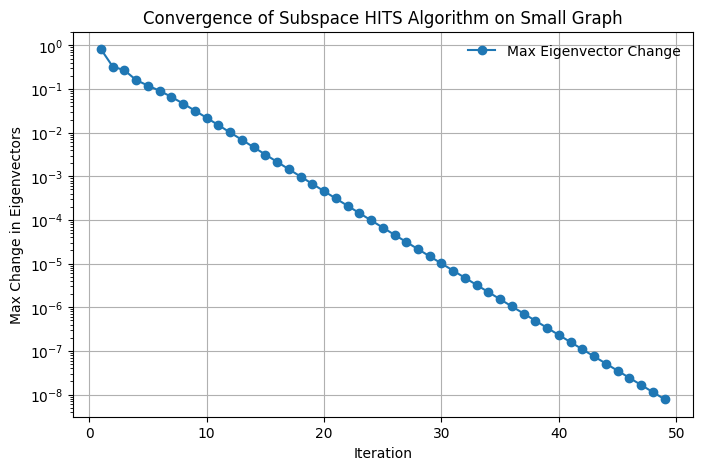

In [63]:
# Small Graph with 10 Nodes
num_nodes_small = 10
edge_prob = 0.3

#Generate Graph
G = generate_connected_directed_graph(num_nodes_small, edge_prob)

k = 3  # Number of dimensions
threshold = 1e-8

# Run Subspace HITS
hub_vectors_small, auth_vectors_small, convergence_changes_small, iterations_small = subspace_hits(G, k, threshold=threshold)

# Plot convergence
plt.figure(figsize=(8, 5))
plt.plot(iterations_small, convergence_changes_small, label="Max Eigenvector Change", marker='o', linestyle='-')
plt.xlabel("Iteration")
plt.ylabel("Max Change in Eigenvectors")
plt.title("Convergence of Subspace HITS Algorithm on Small Graph")
plt.yscale("log")
plt.legend(frameon=False)
plt.savefig('subspace_hits_small')
plt.grid(True)
plt.show()

### Large Graph

Converged in 698 iterations!


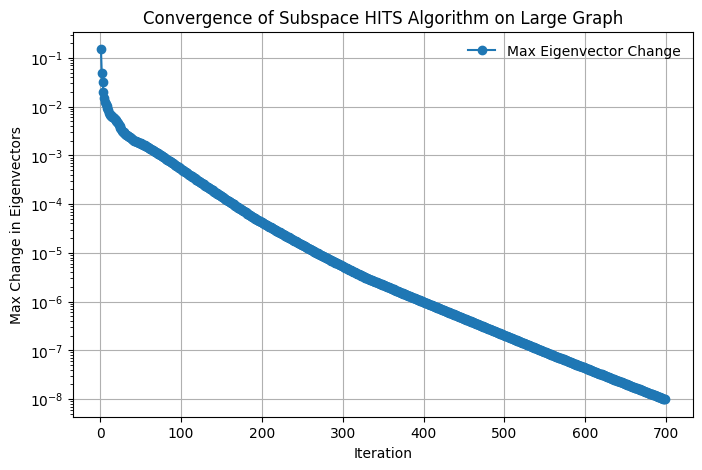

In [66]:
# Large Graph with 1000 Nodes
num_nodes_large = 1000
edge_prob = 0.3

#Generate Graph
G = generate_connected_directed_graph(num_nodes_large, edge_prob)

k = 3  # Number of dimensions
threshold = 1e-8

# Run Subspace HITS
hub_vectors_large, auth_vectors_large, convergence_changes_large, iterations_large = subspace_hits(G, k, threshold=threshold)

# Plot convergence
plt.figure(figsize=(8, 5))
plt.plot(iterations_large, convergence_changes_large, label="Max Eigenvector Change", marker='o', linestyle='-')
plt.xlabel("Iteration")
plt.ylabel("Max Change in Eigenvectors")
plt.title("Convergence of Subspace HITS Algorithm on Large Graph")
plt.yscale("log")
plt.legend(frameon=False)
plt.savefig('subspace_hits_large')
plt.grid(True)
plt.show()

### Combined Plots

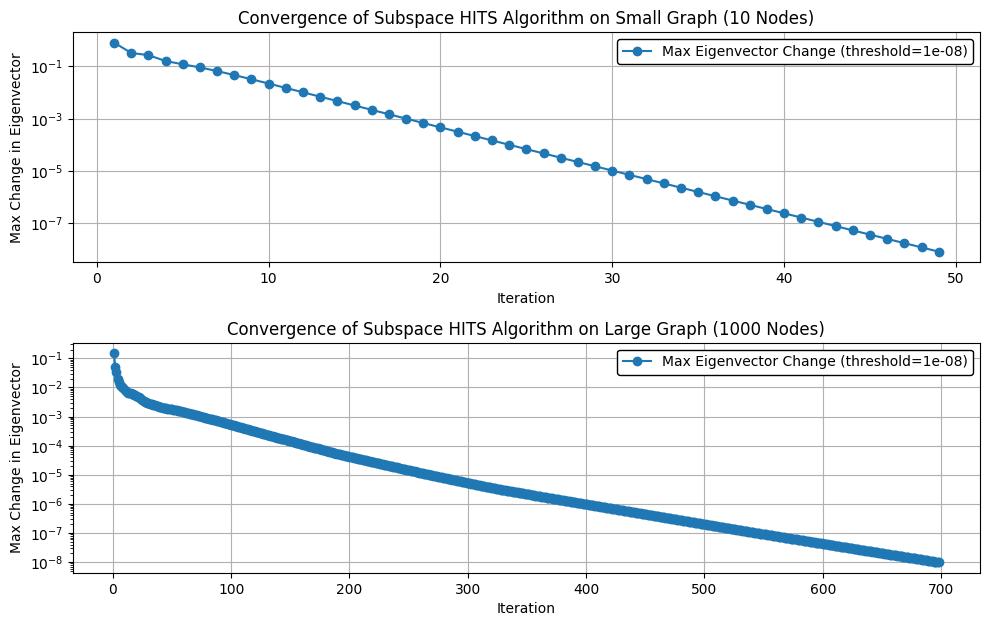

In [69]:
# Create figure
fig = plt.figure(figsize=(10, 8))

# Create subplots using subplot2grid
plot1 = plt.subplot2grid((8, 2), (0, 0), colspan=2, rowspan=3)
plot2 = plt.subplot2grid((8, 2), (3, 0), colspan=2, rowspan=3)

# Plot for Small Graph
plot1.plot(iterations_small, convergence_changes_small, label=f"Max Eigenvector Change (threshold={threshold:g})", marker='o', linestyle='-')
plot1.set_xlabel("Iteration")
plot1.set_ylabel("Max Change in Eigenvector")
plot1.set_title("Convergence of Subspace HITS Algorithm on Small Graph (10 Nodes)")
plot1.set_yscale("log")
plot1.legend(frameon=True, facecolor='white', edgecolor='black', framealpha=1.0)
plot1.grid(True)

# Plot for Large Graph
plot2.plot(iterations_large, convergence_changes_large, label=f"Max Eigenvector Change (threshold={threshold:g})", marker='o', linestyle='-')
plot2.set_xlabel("Iteration")
plot2.set_ylabel("Max Change in Eigenvector")
plot2.set_title("Convergence of Subspace HITS Algorithm on Large Graph (1000 Nodes)")
plot2.set_yscale("log")
plot2.legend(frameon=True, facecolor='white', edgecolor='black', framealpha=1.0)
plot2.grid(True)

plt.tight_layout()
plt.savefig('subspace_hits_comparison.png', bbox_inches='tight', dpi=300)
plt.show()